In [89]:
# import all necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# refining dataframe #

# read the files
hp = pd.read_csv('Characters.csv', delimiter = ";")

# reduce the dataframe to the necessary size
hp = hp[['Gender', 'House', 'Blood status', 'Hair colour', 'Eye colour', 'Loyalty']]

# replace some column labels so that it is easier to code e.g. when using hp.Blood_status.values.tolist()
hp.columns = hp.columns.str.replace("Blood status", "Blood_status")
hp.columns = hp.columns.str.replace("Hair colour", "Hair_colour")
hp.columns = hp.columns.str.replace("Eye colour", "Eye_colour")

# unit ambiguous labels to one label
hp["Blood_status"] = hp["Blood_status"].replace(["Pure-blood or Half-blood", "Pure-blood or half-blood", "Half-blood or pure-blood"], "Pure-blood or half-blood")
hp["Blood_status"] = hp["Blood_status"].str.strip(']').str.strip('[')

# remove rows with certain labels, which in this case are outliers
outlier1 = ["Unknown", "Part-Human (Half-giant)", "Quarter-Veela", "Part-Goblin", "Squib", "Muggle"]
for i in outlier1:
    hp = hp.loc[hp['Blood_status'] != i]

# unit ambiguous labels to one label
hp["Hair_colour"] = hp["Hair_colour"].replace(["Blond", "White-blond", "Silvery-blonde", "White blond", "Straw blond", "Reddish-blonde", "Dirty-blonde", "Sandy", "Straw-coloured"], "Blonde")
hp["Hair_colour"] = hp["Hair_colour"].replace(["Grey", "Silver", "Silver| formerly auburn", "Silver| formerly black", "White (balding)", "Iron grey", "White"], "Silver / White / Grey")
hp["Hair_colour"] = hp["Hair_colour"].replace(["Red ", "Ginger", "Red brown", "Brown/greying", "Auburn"], "Red")
hp["Hair_colour"] = hp["Hair_colour"].replace(["Bald", "Colourless and balding"], "Bald")
hp["Hair_colour"] = hp["Hair_colour"].replace(["Black", "Jet-black", "Colourless and balding"], "Dark")
hp["Hair_colour"] = hp["Hair_colour"].replace(["Mousy brown", "Reddish-brown", "Tawny", "Mousy", "Light brown flecked with grey"], "Brown")

# remove rows with certain labels, which in this case are outliers
outlier2 = ["Variable", "Green"]
for i in outlier2:
    hp = hp.loc[hp['Hair_colour'] != i]

# unit ambiguous labels to one label
hp["Eye_colour"] = hp["Eye_colour"].replace(["Bright green", "Gooseberry"], "Green")
hp["Eye_colour"] = hp["Eye_colour"].replace(["Bright brown", "Scarlet ", "Ruddy", "Hazel"], "Brown")
hp["Eye_colour"] = hp["Eye_colour"].replace(["Black"], "Dark")
hp["Eye_colour"] = hp["Eye_colour"].replace(["Bright Blue", "Grey/Blue[", "Astonishingly blue"], "Blue")
hp["Eye_colour"] = hp["Eye_colour"].replace(["Pale silvery", "Silvery", "Dark Grey"], "Grey")

# remove rows with certain labels, which in this case are outliers
outlier3 = ["One dark, one electric blue", "Pale, freckled", "Yellowish", "Yellow"]
for i in outlier3:
    hp = hp.loc[hp['Eye_colour'] != i]

# unit ambiguous labels to one label
hp.Loyalty = hp.Loyalty.apply(lambda x: "Dumbledore's Army" if not pd.isnull(x) and ("Dumbledore" in x) else x) 
hp.Loyalty = hp.Loyalty.apply(lambda x: "Dumbledore's Army" if not pd.isnull(x) and ("Phoenix" in x) else x) 
hp.Loyalty = hp.Loyalty.apply(lambda x: "Lord Voldemort" if not pd.isnull(x) and ("Voldemort" in x) else x)
hp["Loyalty"] = hp["Loyalty"].replace(["Minister of Magic"], "Ministry of Magic")
hp["Loyalty"] = hp["Loyalty"].replace(["Hogwarts School of Witchcraft and Wizardry"], "Hogwarts School")

# remove rows with certain labels, which in this case are outliers
outlier4 = ["Gellert Grindelwald's Acolytes"]
for i in outlier4:
    hp = hp.loc[hp['Loyalty'] != i]

In [91]:
# preparing lists to insert the data in order of 'Gender', 'Blood status', 'Hair colour', 'Eye colour', 'Loyalty' #

# create 2D house lists of traits in each hous [['Gender'], ['Blood status'], ['Hair colour'], ['Eye colour'], ['Loyalty']]
gryffindor = [] 
hufflepuff = [] 
ravenclaw = [] 
slytherin = []

# get the list of houses in order to sort them according to the gender, blood status, hair colour, eye colour, and loyalty
houselist = np.unique(hp.House.values.tolist())
houselist = houselist[1:5] # remove 'Durmstrang Institute' and 'nan'

gender_index = 0 # for future indexing of each house list
gender = np.unique(hp.Gender.values.tolist())
gender = [x for x in gender if str(x) != 'nan'] # remove 'nan'

bloodstatus_index = 1
bloodstatus = np.unique(hp.Blood_status.values.tolist())
bloodstatus = bloodstatus[0:4] # remove 'Pure-blood or half-blood' and 'nan'
bloodstatus = np.delete(bloodstatus, 2, 0) # remove 'Muggle-born or half-blood'

haircolour_index = 2
haircolour = np.unique(hp.Hair_colour.values.tolist())
haircolour = [x for x in haircolour if str(x) != 'nan'] # remove 'nan'

eyecolour_index = 3
eyecolour = np.unique(hp.Eye_colour.values.tolist())
eyecolour = [x for x in eyecolour if str(x) != 'nan'] # remove 'nan'

loyalty_index = 4
loyalty = np.unique(hp.Loyalty.values.tolist())
loyalty = [x for x in loyalty if str(x) != 'nan'] # remove 'nan'

In [92]:
# inserting data into 2D list for gender (index 0) #

gryffindor_gender = [] # number of ['Female', 'Male'] in Gryffindor
hufflepuff_gender = [] # number of ['Female', 'Male'] in Hufflepuff
ravenclaw_gender = []  # number of ['Female', 'Male'] in Ravenclaw
slytherin_gender = []  # number of ['Female', 'Male'] in Slytherin

for house in houselist: 
    for gen in gender:
    
        # reduce the dataframe from hp to df so that the column is house and row is gen
        df = hp.loc[(hp['House'] == house) & (hp['Gender'] == gen)]
        num_row_df = df.shape[0] # gives number of the row of the reduced dataframe df
            
        if house == 'Gryffindor':
            gryffindor_gender.append(num_row_df) # e.g. num_row_df = number of i = 'Gryffindor, j = 'Female'
        elif house == 'Hufflepuff':
            hufflepuff_gender.append(num_row_df)
        elif house == 'Ravenclaw':
            ravenclaw_gender.append(num_row_df)
        elif house == 'Slytherin':
            slytherin_gender.append(num_row_df)

gryffindor.append(gryffindor_gender) # list of number of ['Female', 'Male'] in Gryffindor is appended to the list gryffindor with index of 0
hufflepuff.append(hufflepuff_gender) # list of number of ['Female', 'Male'] in Hufflepuff is appended to the list hufflepuff with index of 0
ravenclaw.append(ravenclaw_gender)   # list of number of ['Female', 'Male'] in Ravenclaw is appended to the list ravenclaw with index of 0
slytherin.append(slytherin_gender)   # list of number of ['Female', 'Male'] in Slytherin is appended to the list slytherin with index of 0

In [93]:
# inserting data into 2D list for bloodstatus (index 1) #

gryffindor_bloodstatus = [] # number of people with ['Half-blood', 'Muggle-born', 'Pure-blood'] in Gryffindor
hufflepuff_bloodstatus = [] # number of people with ['Half-blood', 'Muggle-born', 'Pure-blood'] in Hufflepuff
ravenclaw_bloodstatus = []  # number of people with ['Half-blood', 'Muggle-born', 'Pure-blood'] in Ravenclaw
slytherin_bloodstatus = []  # number of people with ['Half-blood', 'Muggle-born', 'Pure-blood'] in Slytherin

for house in houselist: 
    for blood in bloodstatus:
        
        # reduce the dataframe from hp to df so that the column is house and row is blood
        df = hp.loc[(hp['House'] == house) & (hp['Blood_status'] == blood)]
        num_row_df = df.shape[0] # gives number of the row of the reduced dataframe df
            
        if house == 'Gryffindor':
            gryffindor_bloodstatus.append(num_row_df)
        elif house == 'Hufflepuff':
            hufflepuff_bloodstatus.append(num_row_df)
        elif house == 'Ravenclaw':
            ravenclaw_bloodstatus.append(num_row_df)
        elif house == 'Slytherin':
            slytherin_bloodstatus.append(num_row_df)

gryffindor.append(gryffindor_bloodstatus) # list gryffindor_bloodstatus is appended to the list gryffindor with index of 1
hufflepuff.append(hufflepuff_bloodstatus) # list hufflepuff_bloodstatus is appended to the list hufflepuff with index of 1
ravenclaw.append(ravenclaw_bloodstatus)   # list ravenclaw_bloodstatus is appended to the list ravenclaw with index of 1
slytherin.append(slytherin_bloodstatus)   # list slytherin_bloodstatus is appended to the list slytherin with index of 1

In [94]:
# inserting data into 2D list for haircolour (index 2) #

gryffindor_haircolour = [] # number of people with the hair colour of ['Bald', 'Blonde', 'Brown', 'Dark', 'Red', 'Silver / White / Grey'] in Gryffindor
hufflepuff_haircolour = [] # number of people with the hair colour of ['Bald', 'Blonde', 'Brown', 'Dark', 'Red', 'Silver / White / Grey'] in Hufflepuff
ravenclaw_haircolour = []  # number of people with the hair colour of ['Bald', 'Blonde', 'Brown', 'Dark', 'Red', 'Silver / White / Grey'] in Ravenclaw
slytherin_haircolour = []  # number of people with the hair colour of ['Bald', 'Blonde', 'Brown', 'Dark', 'Red', 'Silver / White / Grey'] in Slytherin

for house in houselist: 
    for hair in haircolour:
        
        # reduce the dataframe from hp to df so that the column is house and row is hair
        df = hp.loc[(hp['House'] == house) & (hp['Hair_colour'] == hair)]
        num_row_df = df.shape[0] # gives number of the row of the reduced dataframe df
            
        if house == 'Gryffindor':
            gryffindor_haircolour.append(num_row_df)
        elif house == 'Hufflepuff':
            hufflepuff_haircolour.append(num_row_df)
        elif house == 'Ravenclaw':
            ravenclaw_haircolour.append(num_row_df)
        elif house == 'Slytherin':
            slytherin_haircolour.append(num_row_df)

gryffindor.append(gryffindor_haircolour) # list gryffindor_haircolour is appended to the list gryffindor with index of 2
hufflepuff.append(gryffindor_haircolour) # list hufflepuff_haircolour is appended to the list hufflepuff with index of 2
ravenclaw.append(gryffindor_haircolour)  # list ravenclaw_haircolour is appended to the list ravenclaw with index of 2
slytherin.append(gryffindor_haircolour)  # list slytherin_haircolour is appended to the list slytherin with index of 2

In [95]:
# inserting data into 2D list for haircolour (index 3) #

gryffindor_eyecolour = [] # number of people with the eye colour of  ['Blue', 'Brown', 'Dark', 'Green', 'Grey', 'Hazel'] in Gryffindor
hufflepuff_eyecolour = [] # number of people with the eye colour of ['Blue', 'Brown', 'Dark', 'Green', 'Grey', 'Hazel'] in Hufflepuff
ravenclaw_eyecolour = []  # number of people with the eye colour of ['Blue', 'Brown', 'Dark', 'Green', 'Grey', 'Hazel'] in Ravenclaw
slytherin_eyecolour = []  # number of people with the eye colour of ['Blue', 'Brown', 'Dark', 'Green', 'Grey', 'Hazel'] in Slytherin

for house in houselist: 
    for eye in eyecolour:
        
        # reduce the dataframe from hp to df so that the column is house and row is eye
        df = hp.loc[(hp['House'] == house) & (hp['Eye_colour'] == eye)]
        num_row_df = df.shape[0] # gives number of the row of the reduced dataframe df
            
        if house == 'Gryffindor':
            gryffindor_eyecolour.append(num_row_df)
        elif house == 'Hufflepuff':
            hufflepuff_eyecolour.append(num_row_df)
        elif house == 'Ravenclaw':
            ravenclaw_eyecolour.append(num_row_df)
        elif house == 'Slytherin':
            slytherin_eyecolour.append(num_row_df)

gryffindor.append(gryffindor_eyecolour) # list gryffindor_eyecolour is appended to the list gryffindor with index of 3
hufflepuff.append(gryffindor_eyecolour) # list hufflepuff_eyecolour is appended to the list hufflepuff with index of 3
ravenclaw.append(gryffindor_eyecolour)  # list ravenclaw_eyecolour is appended to the list ravenclaw with index of 3
slytherin.append(gryffindor_eyecolour)  # list slytherin_eyecolour is appended to the list slytherin with index of 3

In [96]:
# inserting data into 2D list for haircolour (index 4) #

gryffindor_loyalty = [] # number of supporter of ["Dumbledore's Army", 'Hogwarts School', 'Lord Voldemort', 'Ministry of Magic'] in Gryffindor
hufflepuff_loyalty = [] # number of supporter of ["Dumbledore's Army", 'Hogwarts School', 'Lord Voldemort', 'Ministry of Magic'] in Hufflepuff
ravenclaw_loyalty = []  # number of supporter of ["Dumbledore's Army", 'Hogwarts School', 'Lord Voldemort', 'Ministry of Magic'] in Ravenclaw
slytherin_loyalty = []  # number of supporter of ["Dumbledore's Army", 'Hogwarts School', 'Lord Voldemort', 'Ministry of Magic'] in Slytherin

for house in houselist: 
    for loyal in loyalty:
    
        # reduce the dataframe from hp to df so that the column is house and row is loyal
        df = hp.loc[(hp['House'] == house) & (hp['Loyalty'] == loyal)]
        num_row_df = df.shape[0] # gives number of the row of the reduced dataframe df
            
        if house == 'Gryffindor':
            gryffindor_loyalty.append(num_row_df)
        elif house == 'Hufflepuff':
            hufflepuff_loyalty.append(num_row_df)
        elif house == 'Ravenclaw':
            ravenclaw_loyalty.append(num_row_df)
        elif house == 'Slytherin':
            slytherin_loyalty.append(num_row_df)

gryffindor.append(gryffindor_loyalty) # list gryffindor_loyalty is appended to the list gryffindor with index of 4
hufflepuff.append(hufflepuff_loyalty) # list hufflepuff_loyalty is appended to the list hufflepuff with index of 4
ravenclaw.append(ravenclaw_loyalty)   # list ravenclaw_loyalty is appended to the list ravenclaw with index of 4
slytherin.append(slytherin_loyalty)   # list slytherin_loyalty is appended to the list slytherin with index of 4

In [97]:
def plot(n):
    '''plot is about gender, bloodstatus, haircolour, eyecolour, or loyalty depending on the house.
    the plot is about gender when n= 0, bloodstatus when n= 1, haircolour when n= 2, eyecolour when n= 3, loyalty when n = 4'''

    fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
    try: 
        for row in [0,1]:
            for col in [0,1]:
                        if row == 0 and col == 0:   # upper left plot
                            x = gryffindor[n]       # e.g. if n = 0, it will be indicating to list of ['Female', 'Male'] in Gryffindor, 
                            title = 'Gryffindor'    # which is in index 0 in the list gryffindor
                        elif row == 0 and col == 1: # upper right plot
                            x = hufflepuff[n]
                            title = 'Hufflepuff'
                        elif row == 1 and col == 0: # botton left plot
                            x = ravenclaw[n]
                            title = 'Ravenclaw'
                        else:                       # bottom right plot
                            x = slytherin[n]
                            title = 'Slytherin'

                        axs[row, col].pie(x, shadow=True, startangle = 90) # create pie plots
                        axs[row, col].set_title(title) 

            if n == gender_index: 
                fig.legend(fig,      # the line objects
                    labels=gender,   # the labels for each line
                    loc="center",    # position of legend
                    borderaxespad=0.1,    # small spacing around legend box
                    title="Gender",   # title for the legend
                    fontsize=12       # to make the legend fit the plot
                    )
            elif n == bloodstatus_index:
                fig.legend(fig,         # the line objects
                    labels=bloodstatus, # the labels for each line
                    loc="center",       # position of legend
                    borderaxespad=0.1,  # small spacing around legend box
                    title="Bloodstatus",   # title for the legend
                    fontsize=12         # to make the legend fit the plot
                    )
            elif n == haircolour_index:
                fig.legend(fig,         # the line objects
                    labels=haircolour,  # the labels for each line
                    loc="center",       # position of legend
                    borderaxespad=0.1,  # small spacing around legend box
                    title="Haircolour",   # title for the legend
                    fontsize=12         # to make the legend fit the plot
                    )
            elif n == eyecolour_index:
                fig.legend(fig,        # the line objects
                    labels=eyecolour,  # the labels for each line
                    loc="center",      # position of legend
                    borderaxespad=0.1, # small spacing around legend box
                    title="Eyecolour",   # title for the legend
                    fontsize=12        # to make the legend fit the plot
                    )
            elif n == loyalty_index:
                fig.legend(fig,        # the line objects
                    labels=loyalty,    # the labels for each line
                    loc="center",      # position of legend
                    borderaxespad=0.1, # small spacing around legend box
                    title="Loyalty",   # title for the legend
                    fontsize=12        # to make the legend fit the plot
                    )
    except IndexError:
        print("n should be in range from 0 to 4.") # in case n is out of range from 0 to 4
       

In [98]:
# use explode, explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# donut plot 
    # draw circle
    # centre_circle = plt.Circle((0, 0), 0.70, fc='black') # readjust color depending on background
    # fig = plt.gcf()
    # # Adding Circle in Pie chart
    # fig.gca().add_artist(centre_circle)

C:\Users\prizl\AppData\Local\Temp\ipykernel_37516\2192615836.py:26: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(fig,      # the line objects
C:\Users\prizl\AppData\Local\Temp\ipykernel_37516\2192615836.py:34: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(fig,         # the line objects
C:\Users\prizl\AppData\Local\Temp\ipykernel_37516\2192615836.py:42: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(fig,         # the line objects
C:\Users\prizl\AppData\Local\Temp\ipykernel_37516\2192615836.py:50: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(fig,        # the line objects
C:\Users\prizl\AppData\Local\Temp\ipykernel_37516\2192615836.py:58: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(fig,        # th

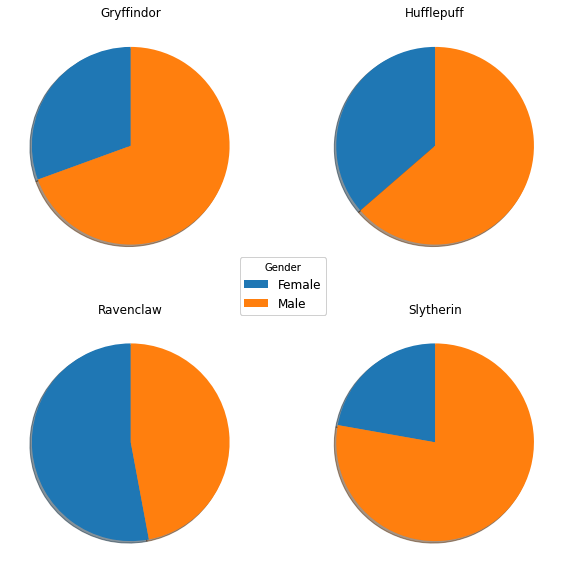

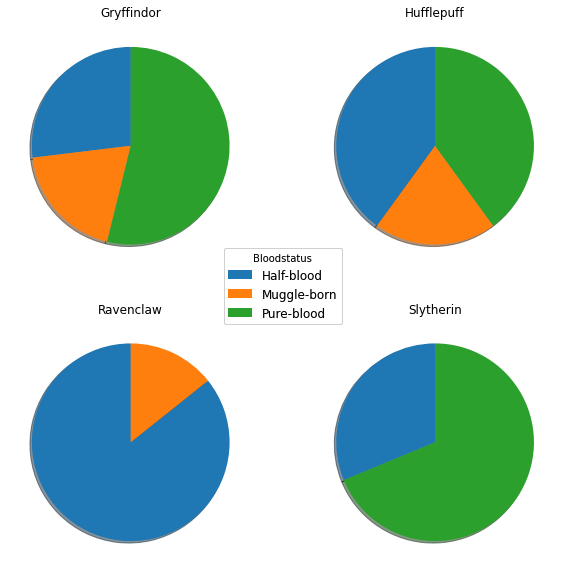

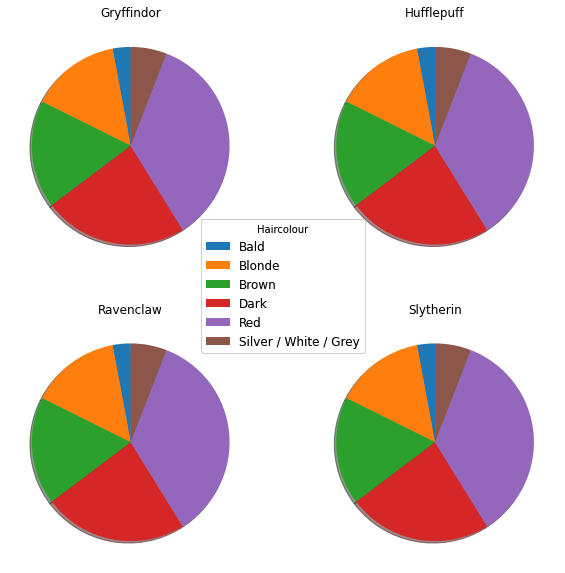

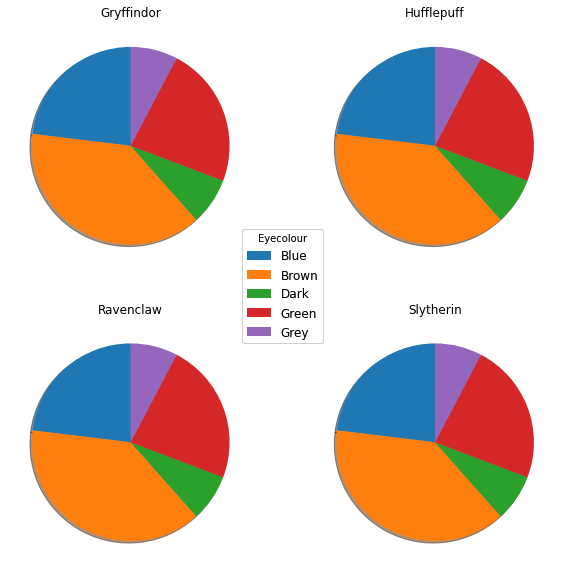

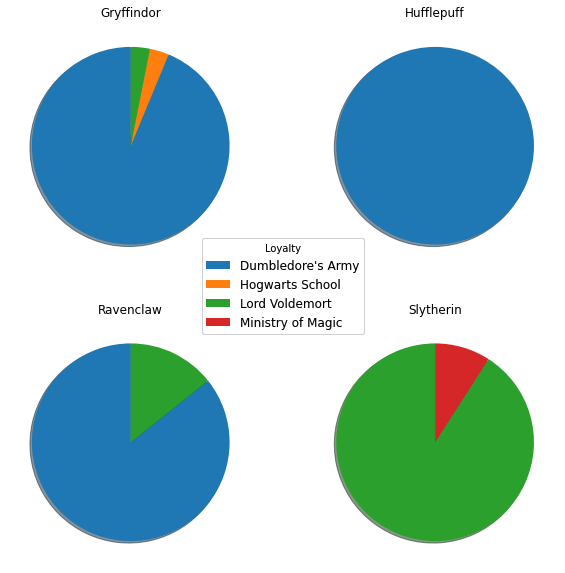

In [99]:
plot(0)
plot(1)
plot(2)
plot(3)
plot(4)